[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
['Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X']
Sara Key is 
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
Khaled key is
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


C:\Users\Khals\AppData\Local\Temp\ipykernel_14572\3531777223.py:16: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  qc.i(i)
C:\Users\Khals\AppData\Local\Temp\ipykernel_14572\3531777223.py:25: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  qc.i(i)
C:\Users\Khals\AppData\Local\Temp\ipykernel_14572\3531777223.py:37: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  qc.i(i)


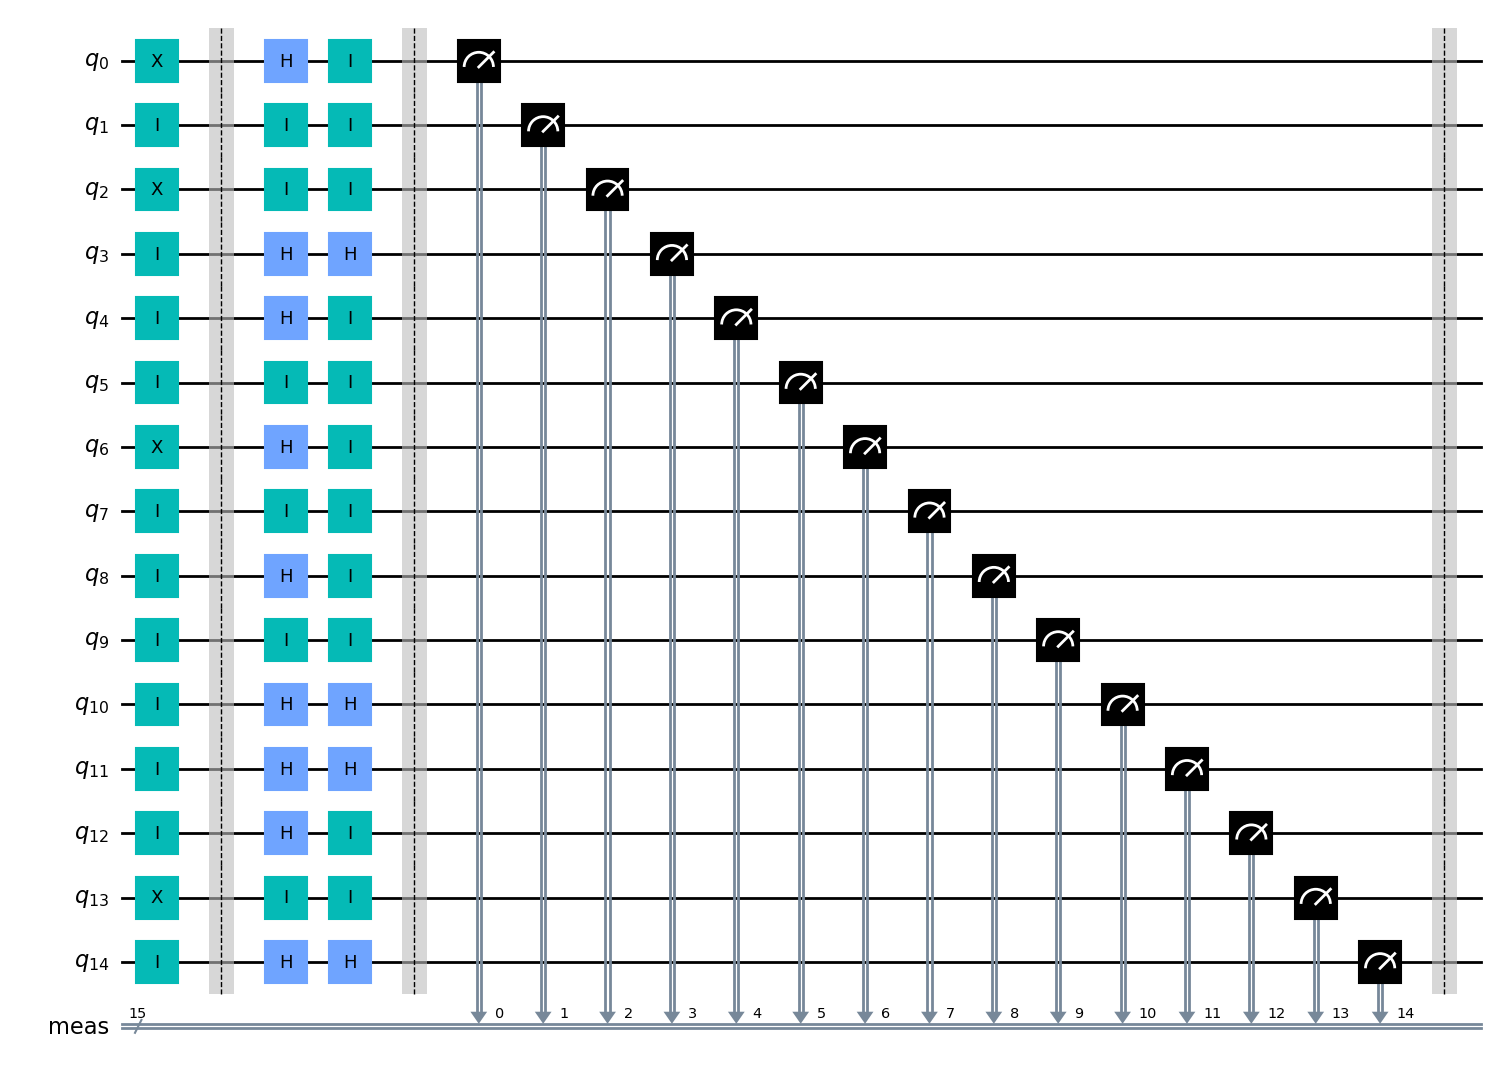

In [63]:
from qiskit import QuantumCircuit, execute, Aer
import random

number_of_bits = 15
l2 =[0,19,False,True,False]
#Getting the 10 random bits and filters
rand_bits = [random.randint(0,1) for i in range(number_of_bits)]
print(rand_bits)

#Applying the bits to the circuit
qc = QuantumCircuit(number_of_bits)
for i in range(number_of_bits):
    if(rand_bits[i]==1):
        qc.x(i)
    else:
        qc.i(i)
qc.barrier()
qc.draw('mpl')


#Getting and Applying the filters to the circuit
S_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
for i in range(number_of_bits):
    if(S_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.draw('mpl')



K_rand_filters = [random.choice(['Z','X']) for i in range(number_of_bits)]
print(K_rand_filters)

for i in range(number_of_bits):
    if(K_rand_filters[i]=='Z'):
        qc.i(i)
    else:
        qc.h(i)
qc.measure_all()
qc.barrier()

output = list(execute(qc,Aer.get_backend('qasm_simulator'), shots=1).result().get_counts())[0]
output = output[::-1] #Reversing output

listofindex = []
for i in range(number_of_bits):
    if(S_rand_filters[i]==K_rand_filters[i]):
        listofindex.append(i)

S_key = [rand_bits[i] for i in listofindex]
K_key = [int(output[i]) for i in listofindex]
print("Sara Key is ")
print(S_key)
print("Khaled key is")
print(K_key)

qc.draw('mpl')


In [64]:
# Seperating list variables to encrypt later
var_1 = l2[0]
var_2 = l2[1]
var_3 = l2[2]
var_4 = l2[3]
var_5 = l2[4]

# user turn user inputs to binary to prepare it for encryption 
binary_var_1 = bin(var_1)
binary_var_2 = bin(var_2)
binary_var_3 = bin(int(var_3))  # Convert boolean to integer before converting to binary
binary_var_4 = bin(int(var_4))  # Convert boolean to integer before converting to binary
binary_var_5 = bin(int(var_5))  # Convert boolean to integer before converting to binary

binary_list = [binary_var_1[2:], binary_var_2[2:], binary_var_3[2:], binary_var_4[2:], binary_var_5[2:]]

print(binary_list)


['0', '10011', '0', '1', '0']


In [65]:
# functions to encrypt and decrypt

def encrypt(message, key):
    encrypted_message = ""
    key_length = len(key)
    for i in range(len(message)):
        encrypted_message += str(int(message[i]) ^ int(key[i % key_length]))
    return encrypted_message

enc=encrypt(l2,S_key)
print(enc)

def decrypt(encrypted_message, key):
    decrypted_message = ""
    key_length = len(key)
    for i in range(len(encrypted_message)):
        decrypted_message += str(int(encrypted_message[i]) ^ int(key[i % key_length]))
    return decrypted_message
dec=decrypt(l2,K_key)
print(dec)


018010
018010


In [66]:
# Encrypting the binary inputs

b1=encrypt(binary_list[0],S_key)
b2=encrypt(binary_list[1],S_key)
b3=encrypt(binary_list[2],S_key)
b4=encrypt(binary_list[3],S_key)
b5=encrypt(binary_list[4],S_key)
print(b1,b2,b3,b4,b5)


0 11011 0 1 0


In [67]:
# Decrypting binary inputs 
db1=decrypt(b1,K_key)

db2=decrypt(b2,K_key)
db3=decrypt(b3,K_key)
db4=decrypt(b4,K_key)
db5=decrypt(b5,K_key)

print(db1,db2,db3,db4,db5)


0 10011 0 1 0


In [68]:
binary_variables = [db1,db2,db3,db4,db5]





# Convert binary variables to normal form
normal_variables = []
for binary in binary_variables:
    if binary.isdigit():  # Check if the binary representation is a digit
        normal_variables.append(int(binary, 2))  # Convert to integer
    elif binary == '1':
        normal_variables.append(True)  # Convert '1' to True
    elif binary == '0':
        normal_variables.append(False)  # Convert '0' to False
    else:
        print(f"Invalid binary representation: {binary}")

print("Normal variables:", normal_variables)

for i in range(-3, 0):  # Loop through the last three items
    if normal_variables[i] == 0:
        normal_variables[i] = False
    elif normal_variables[i] == 1:
        normal_variables[i] = True
    else:
        raise ValueError("Values should be either 0 or 1")

original_message = normal_variables
print(original_message)

Normal variables: [0, 19, 0, 1, 0]
[0, 19, False, True, False]
